

### Citibike Trip Data Analysis
##### Done by Manju Basappa
#### 1. In 2024, total number of trips taken, the average trips per day, the average duration per trip, and the percentage of trips taken by annual members?



In 2024, the CitiBike trip data shows the following:

##### Total trips in 2024: 44302799
##### Average trips per day: 121045.9
##### Average duration per trip (sec): 811.5
##### Average duration per trip (min): 13.52
##### Percentage of trips by annual members: 80.69 %

- Total number of trips:This is the count of all rows in the dataset for the year 2024.

- Average trips per day:This is found by dividing the total number of trips by the number of days in 2024.

- Average duration per trip: This is the mean trip duration (in minutes) calculated from the difference between the start time and end time of each trip.

- Percentage of trips by annual members: This is calculated by dividing the number of trips labeled as "member" by the total number of trips,then converting it into a percentage.

Overall,these metrics give a clear view of how busy the CitiBike system was in 2024, how long trips typically lasted, and how much of the usage came from annual subscribers.



In [ ]:
import pandas as pd

import numpy as np

import glob


FOLDER_PATH = "/Users/mbasappa/Downloads/citibike_trip_data_2024"

files = glob.glob(FOLDER_PATH + "/*.csv")

print("Number of files found:", len(files))

df_list = []

for f in files:

    print("Loading:", f.split("/")[-1])

    df_list.append(pd.read_csv(f, low_memory=False))


df2024 = pd.concat(df_list, ignore_index=True)

print("Total rows loaded:", df2024.shape[0])

df2024.head()

Number of files found: 50
Loading: 202405-citibike-tripdata_3.csv
Loading: 202405-citibike-tripdata_2.csv
Loading: 202405-citibike-tripdata_1.csv
Loading: 202405-citibike-tripdata_5.csv
Loading: 202401-citibike-tripdata_2.csv
Loading: 202412-citibike-tripdata_1.csv
Loading: 202405-citibike-tripdata_4.csv
Loading: 202412-citibike-tripdata_3.csv
Loading: 202401-citibike-tripdata_1.csv
Loading: 202412-citibike-tripdata_2.csv
Loading: 202402-citibike-tripdata_1.csv
Loading: 202411-citibike-tripdata_3.csv
Loading: 202411-citibike-tripdata_2.csv
Loading: 202409-citibike-tripdata_4.csv
Loading: 202406-citibike-tripdata_5.csv
Loading: 202402-citibike-tripdata_2.csv
Loading: 202411-citibike-tripdata_1.csv
Loading: 202402-citibike-tripdata_3.csv
Loading: 202406-citibike-tripdata_4.csv
Loading: 202409-citibike-tripdata_5.csv
Loading: 202409-citibike-tripdata_1.csv
Loading: 202411-citibike-tripdata_4.csv
Loading: 202406-citibike-tripdata_1.csv
Loading: 202406-citibike-tripdata_3.csv
Loading: 20240

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,14B600D81005A372,electric_bike,2024-05-16 19:16:54.560,2024-05-16 19:23:50.267,Pacific St & Smith St,4446.03,Hanson Pl & Ashland Pl,4395.07,40.687881,-73.989393,40.685068,-73.977908,member
1,F249AF72F8B1A1B1,electric_bike,2024-05-22 08:32:18.447,2024-05-22 08:39:55.274,Melrose Ave & E 150 St,7879.01,Washington Ave & E 167 St,8068.01,40.816827,-73.917338,40.829896,-73.907618,member
2,1B1C1A628DB6DAE0,electric_bike,2024-05-18 16:48:58.252,2024-05-18 16:56:38.374,Nassau St & Navy St,4812.02,Hanson Pl & Ashland Pl,4395.07,40.698399,-73.980689,40.685068,-73.977908,casual
3,25182DA0B921F7E3,electric_bike,2024-05-18 17:28:17.315,2024-05-18 17:49:07.249,Melrose Ave & E 150 St,7879.01,E Fordham Rd & Webster Ave,8582.09,40.816827,-73.917338,40.861748,-73.891050,casual
4,30B9FCC38A8F0BD9,electric_bike,2024-05-26 12:43:50.609,2024-05-26 13:02:20.650,11 Ave & W 41 St,6726.01,E 11 St & 3 Ave,5788.16,40.760301,-73.998842,40.731270,-73.988490,casual


In [ ]:
def task1_summary(df: pd.DataFrame) -> dict:


    df = df.copy()


    start_cols = ["started_at", "starttime", "start_time"]

    end_cols   = ["ended_at", "stoptime", "end_time"]

    start_col = next((c for c in start_cols if c in df.columns), None)

    end_col   = next((c for c in end_cols if c in df.columns), None)

    if start_col is None or end_col is None:

        raise ValueError("Could not find start/end time columns in the dataframe.")


    df[start_col] = pd.to_datetime(df[start_col], errors="coerce")

    df[end_col]   = pd.to_datetime(df[end_col], errors="coerce")


    df = df[~df[start_col].isna()].copy()


    df["year"] = df[start_col].dt.year

    df_2024 = df[df["year"] == 2024].copy()

    if df_2024.empty:

        raise ValueError("No trips found for year 2024 in this dataframe.")


    total_trips = df_2024.shape[0]


    df_2024["date"] = df_2024[start_col].dt.date

    days_covered = df_2024["date"].nunique()

    avg_trips_per_day = total_trips / days_covered if days_covered > 0 else np.nan

  

    df_2024["tripduration_sec"] = (df_2024[end_col] - df_2024[start_col]).dt.total_seconds()

    avg_duration_sec = df_2024["tripduration_sec"].dropna().mean()

    avg_duration_min = avg_duration_sec / 60 if not np.isnan(avg_duration_sec) else np.nan


    usertype_cols = ["member_casual", "usertype", "user_type"]

    user_col = next((c for c in usertype_cols if c in df_2024.columns), None)

    if user_col is not None:

        ut = df_2024[user_col].astype(str).str.lower()

        annual_mask = ut.str.contains("member|subscriber|annual", na=False)

        pct_annual_members = annual_mask.mean() * 100

    else:

        pct_annual_members = np.nan

    results = {

        "total_trips": total_trips,

        "avg_trips_per_day": avg_trips_per_day,

        "avg_duration_sec": avg_duration_sec,

        "avg_duration_min": avg_duration_min,

        "pct_annual_members": pct_annual_members

    }

    return results

In [ ]:
summary_2024 = task1_summary(df2024)

print("Total trips in 2024:", summary_2024["total_trips"])

print("Average trips per day:", round(summary_2024["avg_trips_per_day"], 2))

print("Average duration per trip (sec):", round(summary_2024["avg_duration_sec"], 2))

print("Average duration per trip (min):", round(summary_2024["avg_duration_min"], 2))

print("Percentage of trips by annual members:", round(summary_2024["pct_annual_members"], 2), "%")

summary_2024



Total trips in 2024: 44302799
Average trips per day: 121045.9
Average duration per trip (sec): 811.5
Average duration per trip (min): 13.52
Percentage of trips by annual members: 80.69 %


{'total_trips': 44302799,
 'avg_trips_per_day': 121045.89890710382,
 'avg_duration_sec': np.float64(811.4954512284432),
 'avg_duration_min': np.float64(13.524924187140721),
 'pct_annual_members': np.float64(80.68584786256959)}

#### Based on 2024 trip records, plots were created showing the total number of trips taken in: 1)each month of the year, 2) each day of the week, and 3) each hour of the day.



Using the 2024 CitiBike trip data, three visualizations were created to understand when people use the service the most.

1. Trips by month:

   This plot shows how the total number of trips changes across the months of 2024.It helps identify seasonal patterns, such as higher usage in warmer months and lower usage in winter.

2. Trips by day of the week:

   This plot shows the total number of trips for each day of the week.It helps reveal whether usage is higher on weekdays or weekends.

3. Trips by hour of the day:

   This plot shows how trip counts change throughout the day.It helps identify peak usage times, uch as morning and evening commuting hours.

Together,these plots give a clear picture of when CitiBike is used the most during different periods of time.

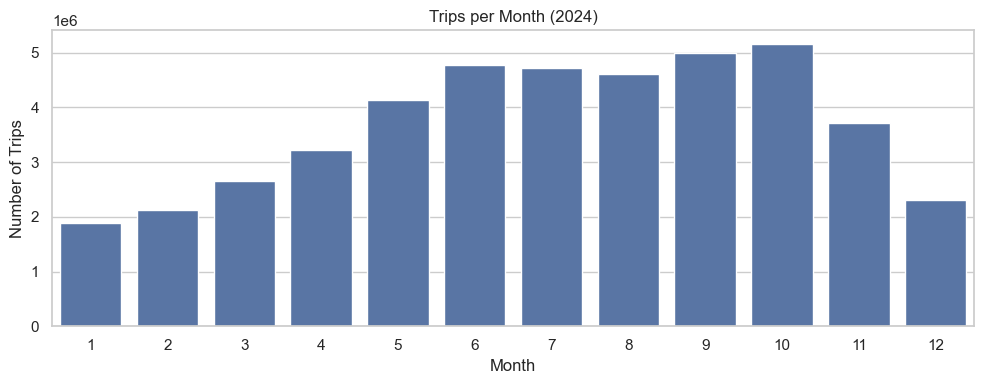

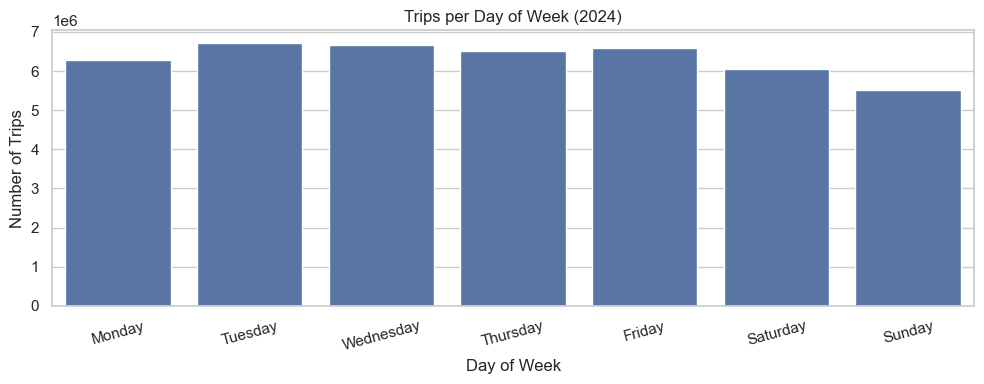

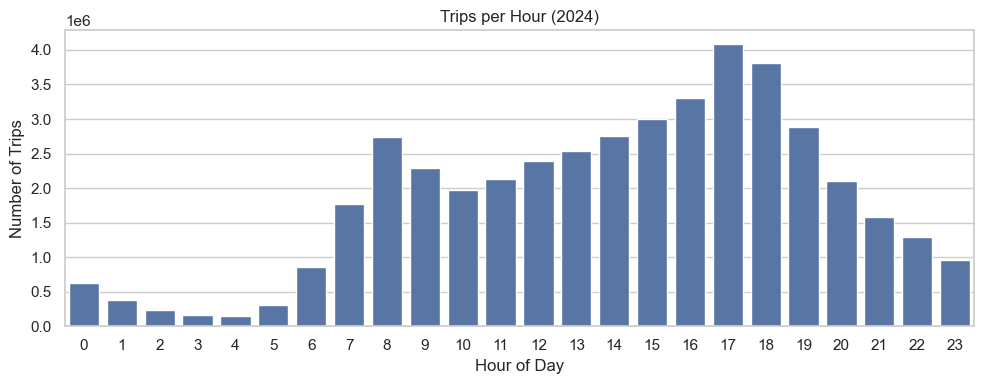

(month
 1     1887908
 2     2121506
 3     2663416
 4     3216957
 5     4135049
 6     4782935
 7     4722952
 8     4603942
 9     4997288
 10    5150717
 11    3709229
 12    2310900
 dtype: int64,
 day_of_week
 Monday       6273127
 Tuesday      6705926
 Wednesday    6661547
 Thursday     6519217
 Friday       6579840
 Saturday     6041323
 Sunday       5521819
 Name: count, dtype: int64,
 hour
 0      623389
 1      375186
 2      240301
 3      160302
 4      144617
 5      311527
 6      855468
 7     1776653
 8     2733372
 9     2291138
 10    1966562
 11    2126369
 12    2395740
 13    2533463
 14    2751660
 15    3002420
 16    3308670
 17    4079790
 18    3805152
 19    2888985
 20    2095690
 21    1578613
 22    1294741
 23     962991
 dtype: int64)

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import os

sns.set(style="whitegrid")

os.makedirs("outputs", exist_ok=True)

def task1_2_plots(df):



    df = df.copy()

    time_cols = ["started_at", "starttime", "start_time"]

    start_col = next((c for c in time_cols if c in df.columns), None)

    if start_col is None:

        raise ValueError("Start time column not found!")


    df[start_col] = pd.to_datetime(df[start_col], errors="coerce")

    df = df.dropna(subset=[start_col])


    df["year"] = df[start_col].dt.year

    df_2024 = df[df["year"] == 2024].copy()

    if df_2024.empty:

        raise ValueError("No 2024 trips in this dataframe.")


    df_2024["month"] = df_2024[start_col].dt.month

    df_2024["day_of_week"] = df_2024[start_col].dt.day_name()

    df_2024["hour"] = df_2024[start_col].dt.hour


    monthly = df_2024.groupby("month").size()

    plt.figure(figsize=(10,4))

    sns.barplot(x=monthly.index, y=monthly.values)

    plt.title("Trips per Month (2024)")

    plt.xlabel("Month")

    plt.ylabel("Number of Trips")

    plt.tight_layout()

    plt.savefig("outputs/trips_per_month_2024.png")

    plt.show()

    monthly.to_csv("outputs/trips_per_month_2024.csv")


    dow_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

    dow = df_2024["day_of_week"].value_counts().reindex(dow_order)

    plt.figure(figsize=(10,4))

    sns.barplot(x=dow.index, y=dow.values)

    plt.title("Trips per Day of Week (2024)")

    plt.xlabel("Day of Week")

    plt.ylabel("Number of Trips")

    plt.xticks(rotation=15)

    plt.tight_layout()

    plt.savefig("outputs/trips_by_day_of_week_2024.png")

    plt.show()

    dow.to_csv("outputs/trips_by_day_of_week_2024.csv")

    hourly = df_2024.groupby("hour").size()

    plt.figure(figsize=(10,4))

    sns.barplot(x=hourly.index, y=hourly.values)

    plt.title("Trips per Hour (2024)")

    plt.xlabel("Hour of Day")

    plt.ylabel("Number of Trips")

    plt.tight_layout()

    plt.savefig("outputs/trips_by_hour_2024.png")

    plt.show()

    hourly.to_csv("outputs/trips_by_hour_2024.csv")


    return monthly, dow, hourly

m, d, h = task1_2_plots(df2024)

m, d, h 

#### Top 10 most popular stations and top 10 most common bike trip routes in 2024.Show the results using bar charts.


The most popular start stations in 2024 were mostly located in busy areas such as Midtown and Lower Manhattan. The top station was “W 21 St & 6 Ave” with 163,490 departures, followed by “8 Ave & W 31 St” and “University Pl & E 14 St.”

The most common bike trip routes were mostly short,local trips.The top route was “Central Park S & 6 Ave → Central Park S & 6 Ave,” meaning many riders started and ended at the same station.Other frequent routes included repeated loops, short neighborhood trips,and routes starting or ending near transit hubs or parks.

I identified the top 10 most popular start stations and the top 10 most common trip routes in 2024.

- The top stations were found by counting how many trips started at each station.

- The top routes were found by counting how often each start-to-end station pair occurred.

- Both results were shown using bar charts.

These charts help show which stations are used the most and which routes are most commonly traveled.

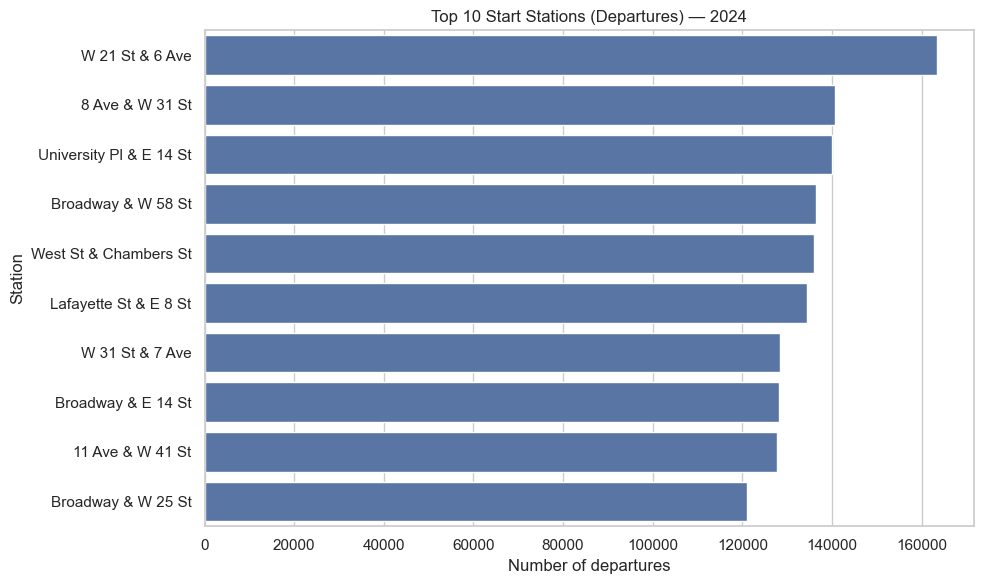

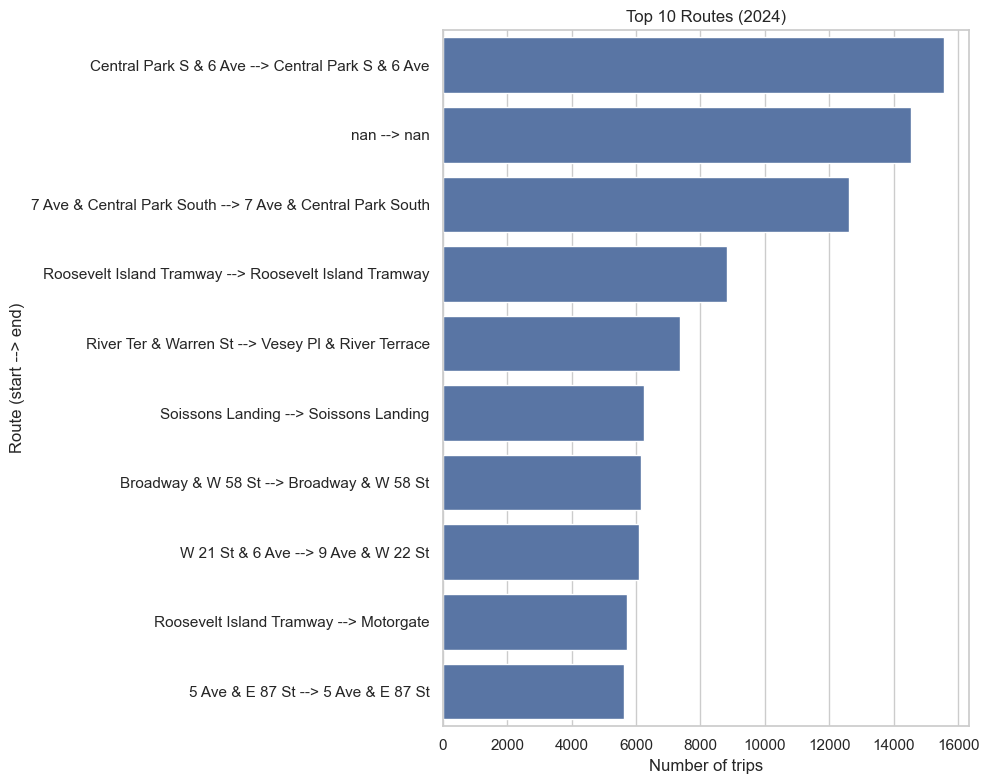

Saved outputs/top10_start_stations_2024.png and outputs/top10_routes_2024.png
Saved outputs/top10_start_stations_2024.csv and outputs/top10_routes_2024.csv


,station,count
0,W 21 St & 6 Ave,163490
1,8 Ave & W 31 St,140701
2,University Pl & E 14 St,140018
3,Broadway & W 58 St,136415
4,West St & Chambers St,135965
5,Lafayette St & E 8 St,134509
6,W 31 St & 7 Ave,128284
7,Broadway & E 14 St,128196
8,11 Ave & W 41 St,127606
9,Broadway & W 25 St,120923


,route,count
0,Central Park S & 6 Ave --> Central Park S & 6 Ave,15572
1,nan --> nan,14549
2,7 Ave & Central Park South --> 7 Ave & Central...,12616
3,Roosevelt Island Tramway --> Roosevelt Island ...,8827
4,River Ter & Warren St --> Vesey Pl & River Ter...,7367
5,Soissons Landing --> Soissons Landing,6232
6,Broadway & W 58 St --> Broadway & W 58 St,6165
7,W 21 St & 6 Ave --> 9 Ave & W 22 St,6091
8,Roosevelt Island Tramway --> Motorgate,5711
9,5 Ave & E 87 St --> 5 Ave & E 87 St,5638


In [ ]:

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import os

sns.set(style="whitegrid")

os.makedirs("outputs", exist_ok=True)

def task1_3_top_stations_routes(df):


    if df is None or df.shape[0] == 0:

        raise ValueError("Empty dataframe provided")

    tmp = df.copy()


    start_id_cols = ["start_station_id", "startstationid", "start_station_id"]

    end_id_cols   = ["end_station_id", "endstationid", "end_station_id"]

    start_name_cols = ["start_station_name", "startstationname", "start_station"]

    end_name_cols   = ["end_station_name", "endstationname", "end_station"]

    start_id_col = next((c for c in start_id_cols if c in tmp.columns), None)

    end_id_col   = next((c for c in end_id_cols if c in tmp.columns), None)

    start_name_col = next((c for c in start_name_cols if c in tmp.columns), None)

    end_name_col   = next((c for c in end_name_cols if c in tmp.columns), None)


    time_cols = ["started_at", "starttime", "start_time"]

    start_time_col = next((c for c in time_cols if c in tmp.columns), None)

    if start_time_col is None:

        raise ValueError("Start time column not found (needed to filter to 2024).")

    tmp[start_time_col] = pd.to_datetime(tmp[start_time_col], errors="coerce")

    tmp = tmp[~tmp[start_time_col].isna()].copy()

    tmp["year"] = tmp[start_time_col].dt.year

    df2024 = tmp[tmp["year"] == 2024].copy()

    if df2024.empty:

        raise ValueError("No 2024 trips found in the dataframe.")


    if start_name_col:

        start_label = df2024[start_name_col].fillna(df2024[start_id_col].astype(str) if start_id_col else "unknown")

    else:

        start_label = df2024[start_id_col].astype(str) if start_id_col else pd.Series(["unknown"] * len(df2024), index=df2024.index)

    if end_name_col:

        end_label = df2024[end_name_col].fillna(df2024[end_id_col].astype(str) if end_id_col else "unknown")

    else:

        end_label = df2024[end_id_col].astype(str) if end_id_col else pd.Series(["unknown"] * len(df2024), index=df2024.index)


    top_stations = start_label.value_counts().head(10)

    top_stations_df = top_stations.reset_index().rename(columns={'index': 'station', 0: 'count'})

    top_stations_df.columns = ['station', 'count']  



    plt.figure(figsize=(10,6))

    sns.barplot(x=top_stations.values, y=top_stations.index)

    plt.xlabel('Number of departures')

    plt.ylabel('Station')

    plt.title('Top 10 Start Stations (Departures) — 2024')

    plt.tight_layout()

    plt.savefig("outputs/top10_start_stations_2024.png", dpi=150)

    plt.show()


    routes = start_label.astype(str) + " --> " + end_label.astype(str)

    top_routes = routes.value_counts().head(10)

    top_routes_df = top_routes.reset_index().rename(columns={'index': 'route', 0: 'count'})

    top_routes_df.columns = ['route', 'count']

    plt.figure(figsize=(10,8))

    sns.barplot(x=top_routes.values, y=top_routes.index)

    plt.xlabel('Number of trips')

    plt.ylabel('Route (start --> end)')

    plt.title('Top 10 Routes (2024)')

    plt.tight_layout()

    plt.savefig("outputs/top10_routes_2024.png", dpi=150)

    plt.show()


    top_stations_df.to_csv("outputs/top10_start_stations_2024.csv", index=False)

    top_routes_df.to_csv("outputs/top10_routes_2024.csv", index=False)

    print("Saved outputs/top10_start_stations_2024.png and outputs/top10_routes_2024.png")

    print("Saved outputs/top10_start_stations_2024.csv and outputs/top10_routes_2024.csv")

    return top_stations_df, top_routes_df


top_stations_df, top_routes_df = task1_3_top_stations_routes(df2024)


display(top_stations_df)

display(top_routes_df)

#### Heatmap depicting the average usage of the top bike station identified in the last question at different times of the day.



I created a heatmap showing the average hourly usage of the most popular station in 2024.


- Identified the top station based on the number of departures.

- Extracted the day of the week and hour from each trip's start time.

- Calculated how many trips started at that station for each day of week and hour.

- Converted the counts into average usage per day to avoid bias from days with more data.

- Displayed the results as a heatmap,where darker colors show higher usage.

The heatmap helps reveal when the top station is busiest,showing clear patterns across days and hours.

Top stations (by departures): ['W 21 St & 6 Ave']


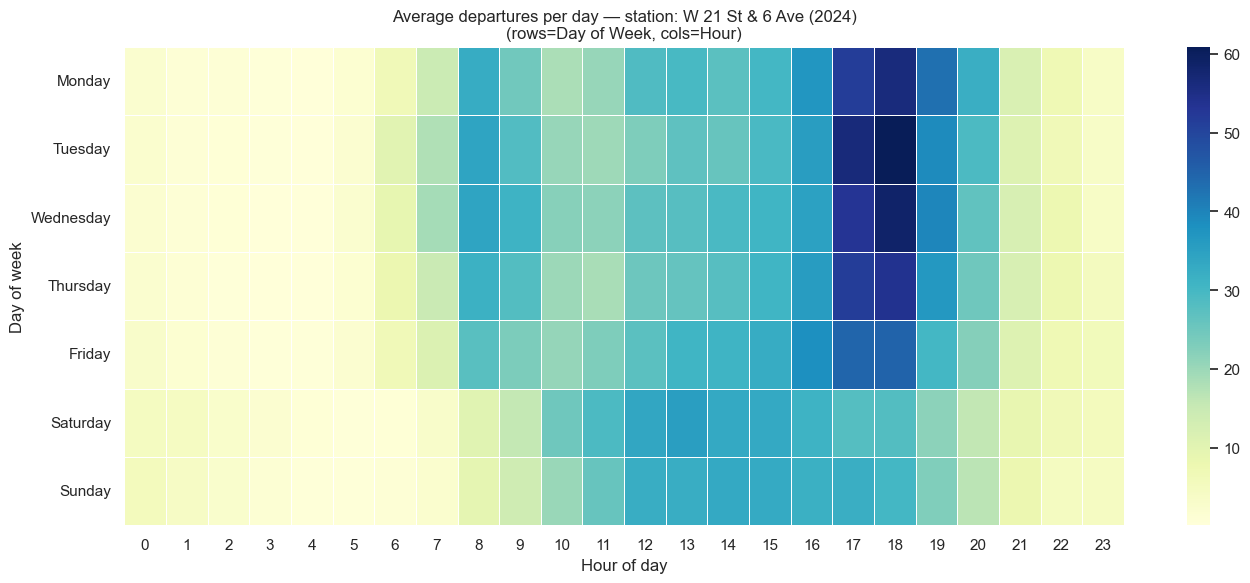

Saved heatmap PNG: outputs/top_station_heatmap_W_21_St_&_6_Ave_2024.png
Saved pivot CSV: outputs/top_station_avg_by_dow_hour_W_21_St_&_6_Ave_2024.csv


_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
_day_of_week,,,,,,,,,,,,,,,,,,,,,
Monday,2.245283,1.075472,0.962264,0.566038,0.301887,1.716981,6.490566,14.603774,32.622642,24.811321,...,27.207547,30.113208,37.056604,51.528302,56.245283,43.056604,31.962264,11.943396,7.132075,3.924528
Tuesday,2.377358,0.867925,0.641509,0.471698,0.150943,1.981132,10.283019,17.735849,34.226415,28.452830,...,25.886792,29.415094,35.716981,56.433962,60.905660,38.886792,29.169811,10.849057,6.415094,3.698113
Wednesday,1.980769,1.057692,0.673077,0.288462,0.307692,2.211538,9.057692,19.038462,34.269231,31.153846,...,29.384615,30.596154,34.942308,53.096154,58.634615,39.750000,26.538462,12.250000,7.692308,3.923077
Thursday,2.153846,1.192308,0.576923,0.269231,0.307692,1.807692,8.057692,14.730769,31.634615,28.326923,...,27.711538,30.730769,35.884615,51.538462,53.788462,36.519231,25.019231,12.250000,7.538462,5.365385
Friday,3.057692,1.750000,0.961538,0.461538,0.500000,1.884615,6.557692,11.519231,27.480769,23.365385,...,30.980769,32.442308,38.346154,44.750000,44.826923,30.115385,22.288462,10.846154,7.038462,5.865385


In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import os

sns.set(style="whitegrid")

os.makedirs("outputs", exist_ok=True)

def task1_4_top_station_heatmap(df, top_n=1):

    if df is None or df.shape[0] == 0:

        raise ValueError("Empty dataframe provided")

    tmp = df.copy()

    time_cols = ["started_at", "starttime", "start_time"]

    start_time_col = next((c for c in time_cols if c in tmp.columns), None)

    if start_time_col is None:

        raise ValueError("Start time column not found (needed to filter to 2024).")

   

    tmp[start_time_col] = pd.to_datetime(tmp[start_time_col], errors='coerce')

    tmp = tmp[~tmp[start_time_col].isna()].copy()

    tmp['year'] = tmp[start_time_col].dt.year

    df2024_local = tmp[tmp['year'] == 2024].copy()

    if df2024_local.empty:

        raise ValueError("No 2024 trips found in dataframe.")


    start_name_cols = ["start_station_name", "startstationname", "start_station"]

    start_id_cols   = ["start_station_id", "startstationid"]

    start_name_col = next((c for c in start_name_cols if c in df2024_local.columns), None)

    start_id_col   = next((c for c in start_id_cols if c in df2024_local.columns), None)

    if start_name_col:

        station_labels = df2024_local[start_name_col].fillna(df2024_local[start_id_col].astype(str) if start_id_col else "unknown")

    elif start_id_col:

        station_labels = df2024_local[start_id_col].astype(str)

    else:

        raise ValueError("No start station name or id column found.")



    df2024_local['_start_label'] = station_labels



    top_stations = df2024_local['_start_label'].value_counts().head(top_n).index.tolist()

    print("Top stations (by departures):", top_stations)

    results = {}

    dow_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']


    df2024_local['_date'] = df2024_local[start_time_col].dt.date

    df2024_local['_day_of_week'] = df2024_local[start_time_col].dt.day_name()

    df2024_local['_hour'] = df2024_local[start_time_col].dt.hour

   

    dates_per_dow = df2024_local.groupby('_day_of_week')['_date'].nunique().reindex(dow_order).fillna(0)

   

    dates_per_dow = dates_per_dow.replace(0, np.nan)

    for station in top_stations:

        st_df = df2024_local[df2024_local['_start_label'] == station].copy()

  

        pivot_counts = st_df.groupby(['_day_of_week','_hour']).size().unstack(fill_value=0).reindex(dow_order).fillna(0)



        pivot_counts = pivot_counts.reindex(columns=range(0,24), fill_value=0)

    

        avg_pivot = pivot_counts.div(dates_per_dow, axis=0)



        avg_pivot = avg_pivot.fillna(0)

        results[station] = avg_pivot


    primary_station = top_stations[0]

    heat_df = results[primary_station]

    plt.figure(figsize=(14,6))

    sns.heatmap(heat_df, cmap='YlGnBu', linewidths=0.5)

    plt.title(f'Average departures per day — station: {primary_station} (2024)\n(rows=Day of Week, cols=Hour)')

    plt.xlabel('Hour of day')

    plt.ylabel('Day of week')

    plt.tight_layout()



    safe_name = str(primary_station).replace('/', '_').replace('\\','_').replace(' ', '_')[:80]

    png_path = f"outputs/top_station_heatmap_{safe_name}_2024.png"

    csv_path = f"outputs/top_station_avg_by_dow_hour_{safe_name}_2024.csv"

    plt.savefig(png_path, dpi=150)

    plt.show()

    heat_df.to_csv(csv_path)

    print(f"Saved heatmap PNG: {png_path}")

    print(f"Saved pivot CSV: {csv_path}")



    return heat_df if top_n == 1 else results


heatmap_df = task1_4_top_station_heatmap(df2024)

heatmap_df.head()

#### Relationship between trip duration and the distance between the start and end stations



There is a weak positive relationship between trip distance and trip duration.In general,longer distances tend to result in longer trips,as seen in the sample values where higher distances correspond to higher durations.However, the relationship is not very strong because many trips with similar distances have different durations.This suggests that factors other than distance, such as traffic, route choice, riding speed, and stop time, also influence how long a trip takes.

To check whether trip duration is related to the distance between the start and end stations, I calculated the straight line distance for each trip using the station coordinates and compared it with the trip duration.

A scatter plot was created to show how duration changes with distance,and a trend line was added to show the overall pattern. Correlation values were also computed to measure the strength of the relationship.

The results show that although longer trips usually take more time,the relationship is weak. Many trips with similar distances have very different durations, likely due to factors such as route choices, traffic conditions, stop and go movement, or user behavior.

Overall,there is only a weak positive relationship between trip distance and trip duration.

Valid records with distance & duration: 44,165,531
Saved valid pairs to: outputs/duration_distance_pairs_2024.csv
Pearson correlation (distance_km, duration_min): 0.0343
Spearman correlation (distance_km, duration_min): 0.7599


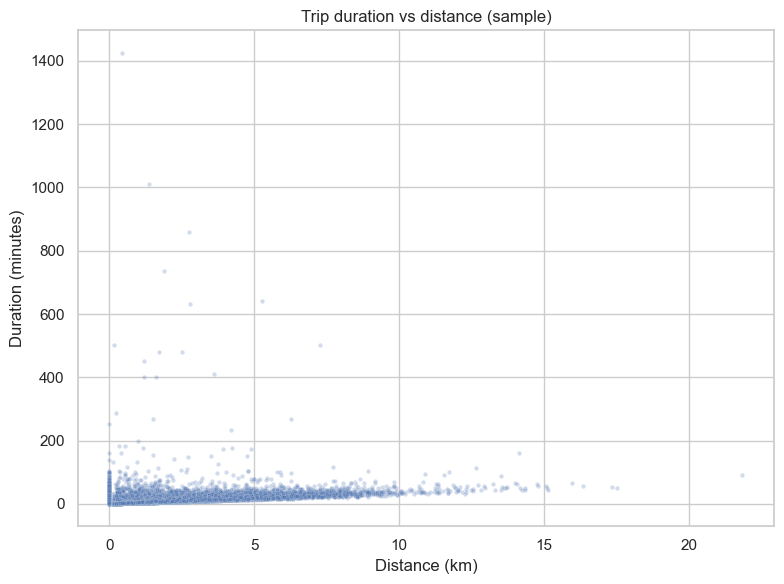

Saved scatter plot to: outputs/duration_vs_distance_scatter_2024.png


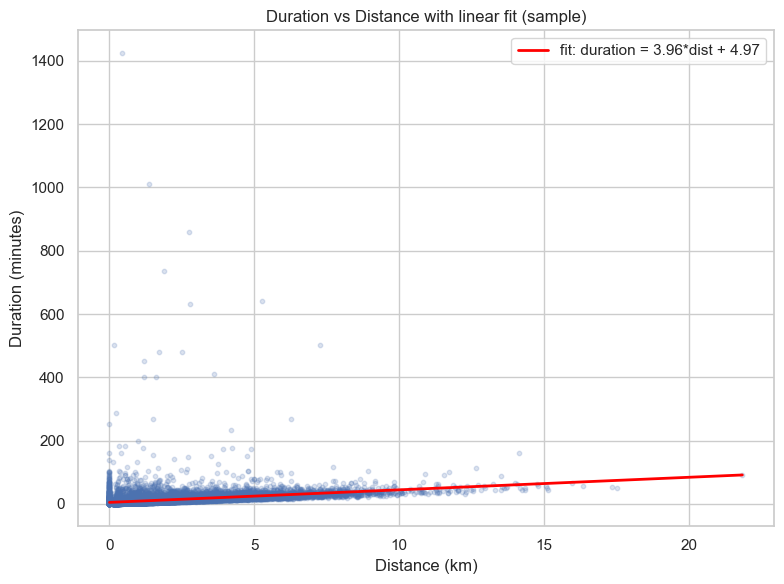

Saved fit plot to: outputs/duration_vs_distance_fit_2024.png


/var/folders/q3/cm3r09jx43l_6v6_j7sb25chwdkhg0/T/ipykernel_88978/3012179398.py:184: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned = valid.groupby('dist_bin')['duration_min'].agg(['mean','count']).reset_index().dropna()


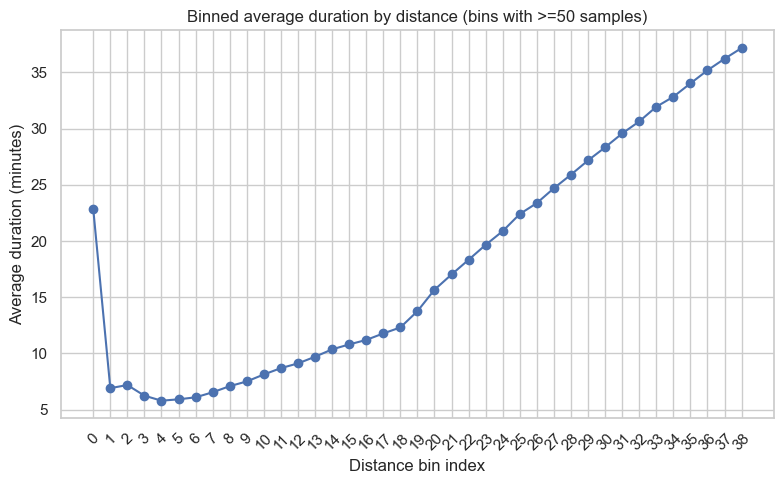

Saved binned averages plot to: outputs/duration_vs_distance_binned_2024.png


,distance_km,duration_min,tripduration_sec
0,1.017666,6.928450,415.707
1,1.667556,7.613783,456.827
2,1.500762,7.668700,460.122
3,5.462640,20.832233,1249.934
4,3.343824,18.500683,1110.041


In [ ]:

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import os

sns.set(style='whitegrid')

os.makedirs('outputs', exist_ok=True)

def haversine(lat1, lon1, lat2, lon2):


    R = 6371.0

    phi1 = np.radians(lat1.astype(float))

    phi2 = np.radians(lat2.astype(float))

    dphi = np.radians((lat2 - lat1).astype(float))

    dlambda = np.radians((lon2 - lon1).astype(float))

    a = np.sin(dphi/2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda/2.0)**2

    a = np.clip(a, 0, 1)

    return R * 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

def task1_5_using_coords(df, sample_n=20000):



    if df is None or df.shape[0] == 0:

        raise ValueError("df is empty")

    df = df.copy()


    if 'started_at' not in df.columns or 'ended_at' not in df.columns:

        raise ValueError("started_at and/or ended_at columns not found")

    df['__started_at'] = pd.to_datetime(df['started_at'], errors='coerce')

    df['__ended_at']   = pd.to_datetime(df['ended_at'], errors='coerce')


    df['tripduration_sec'] = (df['__ended_at'] - df['__started_at']).dt.total_seconds()

    df['duration_min'] = df['tripduration_sec'] / 60.0


    for col in ['start_lat','start_lng','end_lat','end_lng']:

        if col not in df.columns:

            raise ValueError(f"Expected column '{col}' not found in dataframe")

    df['start_lat_num'] = pd.to_numeric(df['start_lat'], errors='coerce')

    df['start_lng_num'] = pd.to_numeric(df['start_lng'], errors='coerce')

    df['end_lat_num']   = pd.to_numeric(df['end_lat'], errors='coerce')

    df['end_lng_num']   = pd.to_numeric(df['end_lng'], errors='coerce')


    df['distance_km'] = haversine(df['start_lat_num'], df['start_lng_num'], df['end_lat_num'], df['end_lng_num'])


    valid = df[df['distance_km'].notna() & df['duration_min'].notna() & (df['duration_min'] >= 0)].copy()

    n_valid = len(valid)

    print(f"Valid records with distance & duration: {n_valid:,}")

    if n_valid == 0:

        print("No valid records — check coordinates and timestamps.")

        return pd.DataFrame(columns=['distance_km','duration_min'])


    out_csv = 'outputs/duration_distance_pairs_2024.csv'

    valid[['distance_km','duration_min']].to_csv(out_csv, index=False)

    print(f"Saved valid pairs to: {out_csv}")


    pearson = valid['distance_km'].corr(valid['duration_min'])

    spearman = valid['distance_km'].corr(valid['duration_min'], method='spearman')

    print(f"Pearson correlation (distance_km, duration_min): {pearson:.4f}")

    print(f"Spearman correlation (distance_km, duration_min): {spearman:.4f}")


    n_plot = min(sample_n, n_valid)

    sample_df = valid.sample(n_plot, random_state=1)

    plt.figure(figsize=(8,6))

    sns.scatterplot(x='distance_km', y='duration_min', data=sample_df, alpha=0.25, s=10)

    plt.xlabel('Distance (km)')

    plt.ylabel('Duration (minutes)')

    plt.title('Trip duration vs distance (sample)')

    plt.tight_layout()

    scatter_path = 'outputs/duration_vs_distance_scatter_2024.png'

    plt.savefig(scatter_path, dpi=150)

    plt.show()

    print(f"Saved scatter plot to: {scatter_path}")


    try:

        from numpy.polynomial.polynomial import polyfit

        xs = sample_df['distance_km'].values

        ys = sample_df['duration_min'].values

        if len(xs) > 1:

            b, a = polyfit(xs, ys, 1)  # intercept b, slope a

            xx = np.linspace(xs.min(), xs.max(), 200)

            yy = a * xx + b

            plt.figure(figsize=(8,6))

            plt.scatter(xs, ys, alpha=0.2, s=10)

            plt.plot(xx, yy, color='red', linewidth=2, label=f'fit: duration = {a:.2f}*dist + {b:.2f}')

            plt.xlabel('Distance (km)')

            plt.ylabel('Duration (minutes)')

            plt.title('Duration vs Distance with linear fit (sample)')

            plt.legend()

            plt.tight_layout()

            fit_path = 'outputs/duration_vs_distance_fit_2024.png'

            plt.savefig(fit_path, dpi=150)

            plt.show()

            print(f"Saved fit plot to: {fit_path}")

    except Exception as e:

        print("Linear fit error:", e)


    try:

        bins = np.concatenate((np.linspace(0, 2, 20), np.linspace(2.5, valid['distance_km'].quantile(0.99), 20)))

        bins = np.unique(bins)

        valid['dist_bin'] = pd.cut(valid['distance_km'], bins=bins, include_lowest=True)

        binned = valid.groupby('dist_bin')['duration_min'].agg(['mean','count']).reset_index().dropna()

        binned = binned[binned['count'] >= 50]  # show bins with at least 50 samples

        if not binned.empty:

            plt.figure(figsize=(8,5))

            plt.plot(range(len(binned)), binned['mean'], marker='o')

            plt.xticks(range(len(binned)), [str(i) for i in range(len(binned))], rotation=45)

            plt.xlabel('Distance bin index')

            plt.ylabel('Average duration (minutes)')

            plt.title('Binned average duration by distance (bins with >=50 samples)')

            plt.tight_layout()

            binned_path = 'outputs/duration_vs_distance_binned_2024.png'

            plt.savefig(binned_path, dpi=150)

            plt.show()

            print(f"Saved binned averages plot to: {binned_path}")

    except Exception as e:

        print("Binned averages error:", e)


    return valid[['distance_km','duration_min','tripduration_sec']].reset_index(drop=True)


valid_pairs_df = task1_5_using_coords(df2024, sample_n=20000)

valid_pairs_df.head()

#### The usage (total number of trips) of all stations on a map of NYC. 



- Calculated the total usage of each station by adding departures and arrivals.

- Used the latitude and longitude values to place each station on the map.

- The size of each circle shows its usage level (larger circle = more trips).

- The color also reflects usage,ranging from green (low) to red (high).

- Created an interactive map and displayed it directly in the notebook.

This map helps identify the busiest areas of the CitiBike system and highlights stations with higher or lower demand across the city.

In [ ]:
import pandas as pd

import numpy as np

import folium

from folium.plugins import MarkerCluster

from IPython.display import IFrame, display

import os

os.makedirs("outputs", exist_ok=True)

def task1_6_station_usage_map_display(df):

    df = df.copy()

    required_cols = ['start_station_id','end_station_id','start_lat','start_lng','end_lat','end_lng']

    for col in required_cols:

        if col not in df.columns:

            raise ValueError(f"Column '{col}' not found in dataframe")


    for c in ['start_lat','start_lng','end_lat','end_lng']:

        df[c] = pd.to_numeric(df[c], errors='coerce')

    df = df.dropna(subset=['start_lat','start_lng','end_lat','end_lng'])


    start_counts = df['start_station_id'].value_counts().rename("departures")

    end_counts   = df['end_station_id'].value_counts().rename("arrivals")

    station_usage = pd.DataFrame({'station_id': start_counts.index})

    station_usage = station_usage.merge(start_counts, left_on='station_id', right_index=True, how='left')

    station_usage = station_usage.merge(end_counts,   left_on='station_id', right_index=True, how='left')

    station_usage = station_usage.fillna(0)

    station_usage['usage'] = station_usage['departures'] + station_usage['arrivals']


    coords = df.groupby('start_station_id')[['start_lat','start_lng']].mean()

    coords = coords.rename(columns={'start_lat':'lat','start_lng':'lng'})

    station_usage = station_usage.merge(coords, left_on='station_id', right_index=True, how='left')

    station_usage = station_usage.dropna(subset=['lat','lng'])


    max_usage = station_usage['usage'].max()

    station_usage['size'] = (station_usage['usage'] / max_usage) * 30 + 3

    def usage_color(u):

        ratio = u / max_usage

        if ratio < 0.25:

            return 'green'

        elif ratio < 0.50:

            return 'orange'

        elif ratio < 0.75:

            return 'darkorange'

        else:

            return 'red'

    station_usage['color'] = station_usage['usage'].apply(usage_color)


    m = folium.Map(location=[40.75, -73.97], zoom_start=12, tiles="cartodbpositron")

    marker_cluster = MarkerCluster().add_to(m)

    for _, row in station_usage.iterrows():

        folium.CircleMarker(

            location=[row['lat'], row['lng']],

            radius=row['size'],

            color=row['color'],

            fill=True,

            fill_opacity=0.7,

            popup=f"Station ID: {row['station_id']}<br>Usage: {row['usage']:,}"

        ).add_to(marker_cluster)


    map_path = "outputs/task1_6_station_usage_map.html"

    m.save(map_path)

    print("Map saved to:", map_path)

    print("Displaying map below...")


    display(IFrame(map_path, width=900, height=700))

    return station_usage

station_usage_df = task1_6_station_usage_map_display(df2024)

station_usage_df.head()



Map saved to: outputs/task1_6_station_usage_map.html
Displaying map below...


,station_id,departures,arrivals,usage,lat,lng,size,color
0,6140.05,163311,163849.0,327160.0,40.741740,-73.994156,33.000000,red
1,6450.05,140422,141704.0,282126.0,40.750585,-73.994685,28.870461,red
2,5905.14,139774,142314.0,282088.0,40.734814,-73.992085,28.866976,red
3,5329.03,135751,136969.0,272720.0,40.717548,-74.013221,28.007947,red
4,5788.13,134287,134929.0,269216.0,40.730207,-73.991026,27.686637,red


### Task 1 Interpretation
1. The results show how heavily the CitiBike system was used in 2024. The total trip count and the average trips per day indicate strong and consistent demand.The average trip duration shows that most rides are short, which fits typical city travel.The percentage of member trips suggests that a large share of the usage comes from regular users rather than occasional riders.

2. The monthly plot shows clear seasonal patterns, with usage increasing in warmer months and dropping in winter. The day of week pattern shows whether CitiBike is used more for commuting (weekday peaks) or leisure (weekend peaks).The hourly pattern highlights the busiest times of day, often showing morning and evening rush hours.

3. The top stations are mostly located in high traffic areas such as Midtown, near parks, transit hubs and busy commercial zones.The top routes show many short local trips and repeated trips within the same area. This suggests that a large portion of CitiBike use is for short distance, neighborhood level travel rather than long commutes.

4. The heatmap shows the times when the most popular station is used the most. Clear peaks appear during morning and evening rush hours,while usage is lower late at night.The pattern across days of the week helps show whether the station is mainly used by commuters, tourists, or a mix of both.

5. There is only a weak relationship between distance and duration.Longer distance trips usually take more time, but many trips with similar distances vary widely in duration.This suggests that travel time depends on more than distance alone, such as traffic,rider behavior, route shape, and stops along the way.

6. The station level map highlights which areas of the city have the highest demand.Larger and darker markers represent stations with heavy use,especially in dense areas with high foot traffic.Stations with lower usage appear smaller and lighter in color.This helps identify where bikes are most needed and where rebalancing or additional capacity may be useful.
